# Algotytm przecinania się odcinków na płaszczyźnie

In [175]:
import numpy as np
import pandas as pd
from bitalg.tests.test4 import Test
from bitalg.visualizer.main import Visualizer
import random
import pygame
import time
import copy
import decimal
decimal.getcontext().prec = 64

# Przydatne funkcje 

In [176]:
def draw_example_1():
    # TODO narysowac to uzywając naszego narzędzia do wizualizacji
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))

    vis.add_line_segment(line_segments)
    vis.show()
    
def draw_example_2():
    # TODO narysowac to uzywając naszego narzędzia do wizualizacji
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))
    points = [(4, 2),
              (2.5, 3.5),
              (5.5, 4.5)]

    vis.add_line_segment(line_segments)
    vis.add_point(points, color='red')
    vis.show()


### Wprowadzenie
Celem ćwiczenia jest implementacja i zapoznanie się z algorytmem wyznaczającym wszystkie przecięcia się odcinków na płaszczyźnie

### Przykładowy zbiór odcinków przed wyznaczeniem punktów przecięcia

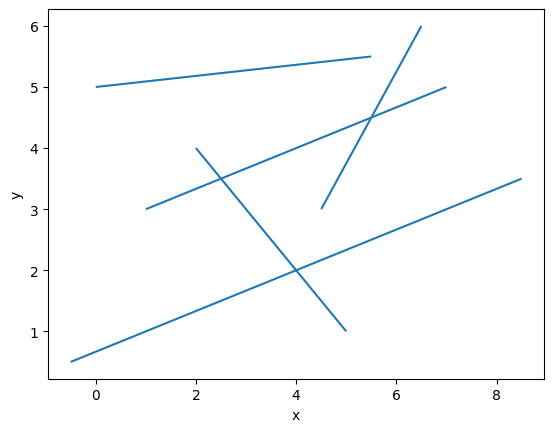

In [177]:
draw_example_1()

### Przykładowy zbiór odcinków po wyznaczenu punktów przecięcia

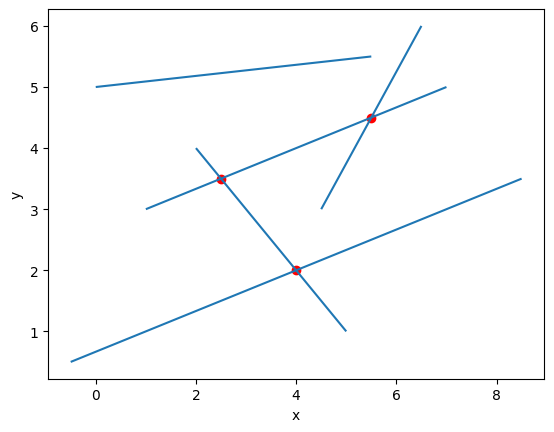

In [178]:
draw_example_2()

# Generowanie losowych odcinków na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_sections```

In [179]:
def generate_uniform_sections(max_x, max_y, n):
    random.seed()
    points = []
    for i in range(n):
        ok=False
        while ok==False:
            x1 = random.random()*max_x
            y1 = random.random()*max_y
            x2 = random.random()*max_x
            y2 = random.random()*max_y
            if x1!=x2:
                ok=True
        new_section=((x1, y1),(x2,y2))
        points.append(new_section)
    return points
    """
    Funkcja generuje odcinki o współrzędnych rzeczywistych w postaci par punktów. 
    Żaden wygenerowany odcinek nie jest odcinkiem pionowym.
    Żadne dwa odcinki nie mają swoich końców o takiej samej współrzędnej x.
    Zakres współrzędnych: x -> (0, max_x), y -> (0, max_y)
    :param max_x: określa maksymalną wartość współrzednej x jaka może zostać wylosowana
    :param max_y: określa maksymalną wartość współrzednej y jaka może zostać wylosowana
    :param n: ilość generowanych odcinków
    :return: tablica odcinków w postaci krotek zawierających parę krotek współrzędnych punktów końcowych odcinków
    np. [((x1, y1), (x2, y2)), ((x3, y3), (x4, y4)),...]
    """
    raise Exception("Unimplemented")

In [180]:
Test().runtest(1, generate_uniform_sections)

Lab 4, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.031s


<span style="color:red">Ćw.</span> Wygeneruj $\large20$ losowych odcinków w przestrzeni 2D o współrzędnych z przedziału $\large x \in \langle 0,1000 \rangle$ oraz $\large y \in \langle 0,1000\rangle$. 

In [181]:
section = generate_uniform_sections(1000, 1000, 100)

Zwizualizuj otrzymane odcinki

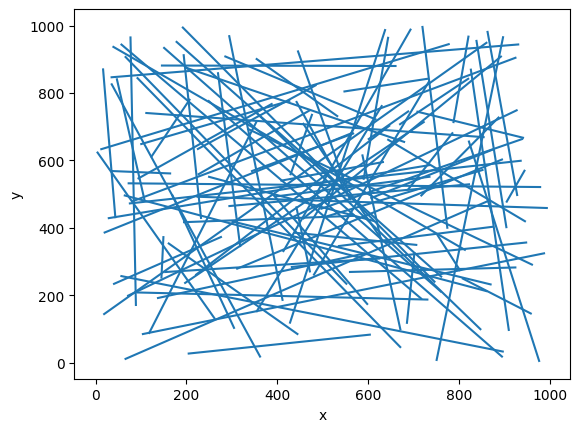

In [182]:
vis = Visualizer()
vis.clear()
vis.add_line_segment(section)
vis.show()

Uzupełnij funkcję ```add_sections``` #interaktywne dodawanie odcinków przez rysowanie myszką (jak?) TODO

In [183]:
#def add_sections(sections):
def Set_sections_using_mouse():    
    pygame.init()
    
    SCREEN_WIDTH=800
    SCREEN_HEIGHT=600
    
    screen=pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))
    
    buttom=pygame.Rect((100,500,120,40))
    nr_points=0
    sections=[]
    first=True
    run=True
    
    while run:
        pygame.draw.rect(screen, (255,0,0), buttom)
        font = pygame.font.SysFont(None, 24)
        img = font.render('End', True, (255,255,255))
        screen.blit(img, (110, 510))
        
        for event in pygame.event.get():
            if event.type==pygame.QUIT:
                sections.clear()
                run=False
            if event.type == pygame.MOUSEBUTTONUP:
                nr_points+=1
                pos = pygame.mouse.get_pos()
                if 100<=pos[0]<=220 and 500<=pos[1]<=540:
                    run=False
                    time.sleep(0.5)
                    break
                else:
                    pygame.draw.circle(screen,(255,0,0),pos,5)
                    if first==False:
                        sections.append((pos_first,pos))
                        pygame.draw.line(screen,(255,0,0),pos,pos_first)
                        first=True
                    else:
                        pos_first=pos
                        first=False

        
        pygame.display.update()
    
    pygame.quit()

    return sections


In [184]:
#Zamknięcie programu przyciskiem "x" spowoduje zwtócenie pustej tablicy
sections=Set_sections_using_mouse()
print (sections)

[((527, 327), (481, 221))]


Uzupełnij funkcję ```is_intersection```

In [185]:
def orient (a,b,c):
    # Występuje tu zamiana typu danych na dokładność do 64 liczb miejsc po przecinku
    eps=1e-30
    new_a=(decimal.Decimal(a[0]),decimal.Decimal(a[1]))
    new_b=(decimal.Decimal(b[0]),decimal.Decimal(b[1]))
    new_c=(decimal.Decimal(c[0]),decimal.Decimal(c[1]))
    det=(new_b[0]-new_a[0])*(new_c[1]-new_b[1])-(new_b[1]-new_a[1])*(new_c[0]-new_b[0])
    if abs(det)<eps:
        return 0
    elif det>0:
        return 1
    else:
        return -1

def Substract(first,second):
    return (first[0]-second[0],first[1]-second[1])

def Determinant (first,second):
    return first[0]*second[1]-first[1]*second[0]

def Find_p(first,second):
    p=first[0]
    q=second[0]
    r=Substract(first[1],p)
    s=Substract(second[1],q)
    u=Determinant(Substract(q-p), r)/Determinant(r,s)
    return ((q[0]+u*s[0],q[1]+u*s[1]))


def Cross(first,second):
    or1=orientation(first[0],first[1],second[0])
    or2=orientation(first[0],first[1],second[1])
    or3=orientation(second[0],second[1],first[0])
    or4=orientation(second[0],second[1],first[1])

    if or1==0 and or2==0 and or3==0 and or4==0:
        return False

    if or1*or2<=0 and or3*or4<=0:
        return True

    return False


def cmp (key,element):
    if element[1]==True:
        point=element[0]
        if key[0]==point[0]:
            return 0
        elif key[0]>point[0]:
            return 1
        else:
            return -1
    else:
        segment=element[0]
        #ax+b
        val_segement=(segment[1][1]-segment[0][1])*(key[0]-segment[0][0])/(segment[1][0]-segment[0][0])+segment[0][1]
        if key[1]==val_segment:
            return 0
        elif key[1]>val_segment:
            return 1
        else:
            return -1


class Tree:
    def __init__(self, data):
        self.left = None
        self.right = None
        self.parent = None
        self.data = data
        
    def insert(self, key):
        if self.data:
            if cmp(key,self.data)<0:
                if self.left is None:
                    self.left = Node(key)
                    self.left.parent = self
                else:
                    self.left.insert(key)
            elif cmp(key,self.data)>=0:
                if self.right is None:
                    self.right = Node(key)
                    self.right.parent = self
                else:
                    self.right.insert(key)
        else:
            self.data = data
            
    def find_greater(root, key):   
        curr = root
        ans = None
        while (curr):
            if cmp(key,curr.data)>0:
                ans = curr
                curr = curr.left
            elif cmp(key,curr.data)==0:
                ans = curr
                break
            else:
                curr = curr.right
        if (ans != None):
            return ans.data
        return None

    def find_smaller(root, key):   
        curr = root
        ans = None
        while (curr):
            if cmp(key,curr.data)<0:
                ans = curr
                curr = curr.right
            elif cmp(key,curr.data)==0:
                ans = curr
                break
            else:
                curr = curr.left
        if (ans != None):
            return ans.data
        return None

    def deleteNode(root, key):
        if root is None:
            return root
        if cmp(key,root.data)>0:
            root.left = deleteNode(root.left, key)
            return root
        elif cmp(key,root.data)<0:
            root.right = deleteNode(root.right, key)
            return root
        else:
            if root.left is None:
                return root.right
            elif root.right is None:
                return root.left
            else:
                currParent = root
                curr = root.right
                while curr.left is not None:
                    currParent = curr
                    curr = curr.left
                if currParent != root:
                    currParent.left = curr.right
                else:
                    currParent.right = curr.right
                root.key = curr.key
                return root

    def search(root,key):
        if self.data:
            if cmp(key,self.data)<0:
                if self.left is None:
                    return -1
                else:
                    self.left.insert(root.left,key)
            elif cmp(key,self.data)>=0:
                if self.right is None:
                    retrun -1
                else:
                    self.right.insert(root.right,key)
            else:
                return root
        else:
            return root

    def replace (root1,root2):
        left1=root1.left
        left2=root2.left
        right1=root1.right
        right2=root2.right
        parent1=root1.parent
        parent2=root2.parent
        root1.left=left2
        root1.right=right2
        root1.parent=parent2
        root2.left=left1
        root2.right=right1
        root2.parent=parent1

    def find_minimum(root):
        while root.left!=None:
            root=root.left
        return root.data






def is_intersection(sections):
    P=[]
    Q=Tree()
    T=Tree()
    for i in range (len(sections)):
        if len(P)==1:
            return True
        first=sections[i][0]
        second=sections[i][1]
        Q.insert([first,1])
        root=Q
        Q.insert([second,-1])
        if i==0:
            root_Q=Tree(first)
        if first[0]>second[0]:
            T.insert([first,second])
            if i==0:
                root_T=Tree([first,second])
        else:
            T.insert([second,first])
            if i==0:
                root_T=Tree([second,first])

    finish=0
    curr=Q.find_minimum()
    while finish!=None:
        if curr[1]==1:
            greater=Tree.find_greater(root_T,curr)
            smaller=Tree.find_smaller(root_T,curr)
            curr_seg=Tree.search(root_t,curr)
            if cross(curr_seg,greater)==True:
                p=Find_p(curr_seg,greater)
                P.append(p)
                Tree.insert(root_Q,p,(curr_seg,greater))
            if cross(curr_seg,smaller)==True:
                p=Find_p(curr_seg,smaller)
                P.append(p)
                Tree.insert(root_Q,(p,0,(curr_seg,smaller)))
        elif curr[1]==-1:
            greater=Tree.find_greater(root_T,curr)
            smaller=Tree.find_smaller(root_T,curr)
            if cross(curr_seg,greater)==True:
                p=Find_p(curr_seg,greater)
                if Tree.search(root_P,p) == -1:
                    P.append(p)
                    Tree.insert(root_Q,(p,0,(curr_seg,greater)))
            if cross(curr_seg,greater)==True:
                p=Find_p(curr_seg,smaller)
                if Tree.search(root_P,p) == -1:
                    P.append(p)
                    Tree.insert(root_Q,(p,0,(curr_seg,smaller)))
        elif curr[1]==0:
            s1=curr[2][0]
            s2=curr[2][1]
            root1=Tree.search(root_P,s1)
            root2=Tree.search(root_P,s2)
            Tree.replace(root1,root2)
            if cross(s1,greater)==True:
                p=Find_p(curr_seg,greater)
                if Tree.search(root_P,p) == -1:
                    P.append(p)
                    Tree.insert(root_Q,(p,0,(s1,greater)))
            if cross(s1,greater)==True:
                p=Find_p(curr_seg,smaller)
                if Tree.search(root_P,p) == -1:
                    P.append(p)
                    Tree.insert(root_Q,(p,0,(s1,smaller)))
            if cross(s2,greater)==True:
                p=Find_p(s2,greater)
                if Tree.search(root_P,p) == -1:
                    P.append(p)
                    Tree.insert(root_Q,(p,0,(s2,greater)))
            if cross(s2,greater)==True:
                p=Find_p(s2,smaller)
                if Tree.search(root_P,p) == -1:
                    P.append(p)
                    Tree.insert(root_Q,(p,0,(s2,smaller)))
        else:
            finish=None
            
            
    return False

    
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina 
    :param sections: tablica odcinków w postaci krotek krotek współrzędnych punktów końcowych odcinków
    :param eps: epsilon będący dokładnością, z jaką porównujemy liczby zmiennoprzecinkowe
    :return: True / False
    """
    raise Exception("Unimplemented")

In [12]:
Test().runtest(2, is_intersection)

Lab 4, task 2:
	Test 1: 

TypeError: Tree.__init__() missing 1 required positional argument: 'data'

### W jaki sposób zaimplementowałeś struktura stanu (stan miotły) oraz struktura zdarzeń w Twoim programie?

Odpowiedź here

Uzupełnij funkcję ```is_intersection_with_visualization```

In [5]:
def Get_vis(P,sections,curr_points):
    points=[]
    for i in range (len(sections)):
        points.append(sections[i][0])
        points.append(sections[i][1])
    vis = Visualizer()
    vis.clear()
    points = polygon
    vis.add_point(points, color=['green'])
    vis.add_point(curr_points, color=['red'])
    vis.add_line_segment(tri_line_segments, color='orange')
    vis.show()



def orient (a,b,c):
    # Występuje tu zamiana typu danych na dokładność do 64 liczb miejsc po przecinku
    eps=1e-30
    new_a=(decimal.Decimal(a[0]),decimal.Decimal(a[1]))
    new_b=(decimal.Decimal(b[0]),decimal.Decimal(b[1]))
    new_c=(decimal.Decimal(c[0]),decimal.Decimal(c[1]))
    det=(new_b[0]-new_a[0])*(new_c[1]-new_b[1])-(new_b[1]-new_a[1])*(new_c[0]-new_b[0])
    if abs(det)<eps:
        return 0
    elif det>0:
        return 1
    else:
        return -1

def Substract(first,second):
    return (first[0]-second[0],first[1]-second[1])

def Determinant (first,second):
    return first[0]*second[1]-first[1]*second[0]

def Find_p(first,second):
    p=first[0]
    q=second[0]
    r=Substract(first[1],p)
    s=Substract(second[1],q)
    u=Determinant(Substract(q-p), r)/Determinant(r,s)
    return ((q[0]+u*s[0],q[1]+u*s[1]))


def Cross(first,second):
    or1=orientation(first[0],first[1],second[0])
    or2=orientation(first[0],first[1],second[1])
    or3=orientation(second[0],second[1],first[0])
    or4=orientation(second[0],second[1],first[1])

    if or1==0 and or2==0 and or3==0 and or4==0:
        return False

    if or1*or2<=0 and or3*or4<=0:
        return True

    return False


def cmp (key,element):
    if len(element[1])==1:
        point=element
        if key[0]==point[0]:
            return 0
        elif key[0]>point[0]:
            return 1
        else:
            return -1
    else:
        segment=element
        #ax+b
        val_segement=(segment[1][1]-segment[0][1])*(key[0]-segment[0][0])/(segment[1][0]-segment[0][0])+segment[0][1]
        if key[1]==val_segment:
            return 0
        elif key[1]>val_segment:
            return 1
        else:
            return -1


class Tree:
    def __init__(self, data):
        self.left = None
        self.right = None
        self.parent = None
        self.data = data
        
    def insert(self, key):
        if self.data:
            if cmp(key,self.data)<0:
                if self.left is None:
                    self.left = Node(key)
                    self.left.parent = self
                else:
                    self.left.insert(key)
            elif cmp(key,self.data)>=0:
                if self.right is None:
                    self.right = Node(key)
                    self.right.parent = self
                else:
                    self.right.insert(key)
        else:
            self.data = data
            
    def find_greater(root, key):   
        curr = root
        ans = None
        while (curr):
            if cmp(key,curr.data)>0:
                ans = curr
                curr = curr.left
            elif cmp(key,curr.data)==0:
                ans = curr
                break
            else:
                curr = curr.right
        if (ans != None):
            return ans.data
        return None

    def find_smaller(root, key):   
        curr = root
        ans = None
        while (curr):
            if cmp(key,curr.data)<0:
                ans = curr
                curr = curr.right
            elif cmp(key,curr.data)==0:
                ans = curr
                break
            else:
                curr = curr.left
        if (ans != None):
            return ans.data
        return None

    def deleteNode(root, key):
        if root is None:
            return root
        if cmp(key,root.data)>0:
            root.left = deleteNode(root.left, key)
            return root
        elif cmp(key,root.data)<0:
            root.right = deleteNode(root.right, key)
            return root
        else:
            if root.left is None:
                return root.right
            elif root.right is None:
                return root.left
            else:
                currParent = root
                curr = root.right
                while curr.left is not None:
                    currParent = curr
                    curr = curr.left
                if currParent != root:
                    currParent.left = curr.right
                else:
                    currParent.right = curr.right
                root.key = curr.key
                return root

    def search(root,key):
        if self.data:
            if cmp(key,self.data)<0:
                if self.left is None:
                    return -1
                else:
                    self.left.insert(root.left,key)
            elif cmp(key,self.data)>=0:
                if self.right is None:
                    retrun -1
                else:
                    self.right.insert(root.right,key)
            else:
                return root
        else:
            return root

    def replace (root1,root2):
        left1=root1.left
        left2=root2.left
        right1=root1.right
        right2=root2.right
        parent1=root1.parent
        parent2=root2.parent
        root1.left=left2
        root1.right=right2
        root1.parent=parent2
        root2.left=left1
        root2.right=right1
        root2.parent=parent1

    def find_minimum(root):
        while root.left!=None:
            root=root.left
        return root.data






def is_intersection_with_visualization(sections): # TODO wizualizacja (jak?)
    P=[]
    Q=Tree()
    T=Tree()
    for i in range (len(sections)):
        first=sections[i][0]
        second=sections[i][1]
        Q.insert([first,1])
        root=Q
        Q.insert([second,-1])
        if i==0:
            root_Q=Tree(first)
        if first[0]>second[0]:
            T.insert([first,second])
            if i==0:
                root_T=Tree([first,second])
        else:
            T.insert([second,first])
            if i==0:
                root_T=Tree([second,first])

    finish=0
    curr=Q.find_minimum()
    while finish!=None:
        if len(P)==1:
            return True
        if curr[1]==1:
            greater=Tree.find_greater(root_T,curr)
            smaller=Tree.find_smaller(root_T,curr)
            curr_seg=Tree.search(root_t,curr)
            if cross(curr_seg,greater)==True:
                p=Find_p(curr_seg,greater)
                P.append(p)
                Tree.insert(root_Q,p,(curr_seg,greater))
                Get_vis(P,sections,curr_points)
            if cross(curr_seg,smaller)==True:
                p=Find_p(curr_seg,smaller)
                P.append(p)
                Tree.insert(root_Q,(p,0,(curr_seg,smaller)))
                Get_vis(P,sections,curr_points)
        elif curr[1]==-1:
            greater=Tree.find_greater(root_T,curr)
            smaller=Tree.find_smaller(root_T,curr)
            if cross(curr_seg,greater)==True:
                p=Find_p(curr_seg,greater)
                if Tree.search(root_P,p) = -1:
                    P.append(p)
                    Tree.insert(root_Q,(p,0,(curr_seg,greater)))
                    Get_vis(P,sections,curr_points)
            if cross(curr_seg,greater)==True:
                p=Find_p(curr_seg,smaller)
                if Tree.search(root_P,p) = -1:
                    P.append(p)
                    Tree.insert(root_Q,(p,0,(curr_seg,smaller)))
                    Get_vis(P,sections,curr_points)
        elif curr[1]==0:
            s1=curr[2][0]
            s2=curr[2][1]
            root1=Tree.search(root_P,s1)
            root2=Tree.search(root_P,s2)
            Tree.replace(root1,root2)
            if cross(s1,greater)==True:
                p=Find_p(curr_seg,greater)
                if Tree.search(root_P,p) = -1:
                    P.append(p)
                    Tree.insert(root_Q,(p,0,(s1,greater)))
                    Get_vis(P,sections,curr_points)
            if cross(s1,greater)==True:
                p=Find_p(curr_seg,smaller)
                if Tree.search(root_P,p) = -1:
                    P.append(p)
                    Tree.insert(root_Q,(p,0,(s1,smaller)))
                    Get_vis(P,sections,curr_points)
            if cross(s2,greater)==True:
                p=Find_p(s2,greater)
                if Tree.search(root_P,p) = -1:
                    P.append(p)
                    Tree.insert(root_Q,(p,0,(s2,greater)))
                    Get_vis(P,sections,curr_points)
            if cross(s2,greater)==True:
                p=Find_p(s2,smaller)
                if Tree.search(root_P,p) = -1:
                    P.append(p)
                    Tree.insert(root_Q,(p,0,(s2,smaller)))
                    Get_vis(P,sections,curr_points)
        else:
            finish=None
                
    return False       
            
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: True / False
    """
    raise Exception("Unimplemented")

SyntaxError: cannot assign to function call here. Maybe you meant '==' instead of '='? (2400644095.py, line 250)

Uzupełnij funkcję ```find_intersections```

In [232]:
eps = 1e-30
point_type=True
segment_type=False
starting_point=1
ending_point=2
crossing_point=3
two_starting_points=4
two_ending_points=5
starting_point_and_ending_point=6



def cmp(key,element):
    if key.type == point_type:
        cmp_key=key.data
    else:
        cmp_key=key.marked_point
    #punkt
    if element.type==point_type:
        point=element.data
        if abs(cmp_key[0]-point[0])<eps:
            return 0
        elif cmp_key[0]>point[0]:
            return 1
        else:
            return -1
    #odcinek
    else:
        segment=element.data
        #ax+b
        val_segment=(segment[1][1]-segment[0][1])*(cmp_key[0]-segment[0][0])/(segment[1][0]-segment[0][0])+segment[0][1]
        if abs(cmp_key[1]-val_segment)<eps:
            return 0
        elif cmp_key[1]>val_segment:
            return 1
        else:
            return -1
         


def cmp_exact(key,element):
    cmp_key=key.data
    #punkt
    if element.type==point_type:
        point=element.data
        if cmp_key[0]==point[0] and cmp_key[1]==point[1] and key.purpose==element.purpose:
            return True
        else:
            return False
    #odcinek
    else:
        segment=element.data
        if cmp_key[0][0]==segment[0][0] and cmp_key[0][1]==segment[0][1] and cmp_key[1][0]==segment[1][0] and cmp_key[1][1]==segment[1][1]:
            return True
        else:
            return False


def change_type(new,old):
    if new.type == starting_point and old.type == starting_point:
        return two_starting_points
    elif new.type == ending_point and old.type == ending_point:
        return two_ending_points
    else:
        return starting_point_and_ending_point


class Element:
    def __init__(self,data,type,purpose=None, on_segment=None, first_crossed=None, second_crossed=None, marked_point=None, idx=None):
        self.data = data
        self.type = type
        self.purpose = purpose
        self.on_segment = on_segment
        self.first_crossed = first_crossed
        self.second_crossed = second_crossed
        self.marked_point = marked_point
        self.idx = idx


class Tree:
    def __init__(self, data):
        self.left = None
        self.right = None
        self.data = data
        
    def insert(self, key):
        if cmp(key,self.data)<0:
            if self.left is None:
                self.left = Tree(key)
            else:
                self.left.insert(key)
        elif cmp(key,self.data)>=0:
            if self.right is None:
                self.right = Tree(key)
            else:
                self.right.insert(key)

    
    def insert_with_check(self,key):
        if cmp_exact(key,self.data)==True:
            self.data.type = change_type(key,self.data)
        elif cmp(key,self.data)<0:
            if self.left is None:
                self.left = Tree(key)
            else:
                self.left.insert(key)
        elif cmp(key,self.data)>=0:
            if self.right is None:
                self.right = Tree(key)
            else:
                self.right.insert(key)       

            
    def find_greater(self, key):   
        curr = self
        ans = None
        while (curr):
            if cmp(key,curr.data)<0:
                ans = curr
                curr = curr.left
            else:
                curr = curr.right
        if ans:
            return ans.data
        return None

    
    def find_equal_or_greater(self, key):   
        curr = self
        ans = None
        while (curr):
            if cmp(key,curr.data)<0:
                ans = curr
                curr = curr.left
            elif cmp(key,self.data)>0:
                curr = curr.right
            else:
                ans = curr
                break
        if ans:
            return ans.data
        return None

    
    def find_smaller(self, key):   
        curr = self
        ans = None
        while (curr):
            if cmp(key,curr.data)>0:
                ans = curr
                curr = curr.right
            else:
                curr = curr.left
        if ans:
            return ans.data
        return None

    
    def delete(self, key):
        left = -1
        right = 1
        to_delete = None
        prev_to_delete = None
        to_replace = None
        curr = self
        # znajdowanie elmentu do usunięcia
        while True:
            if cmp_exact(key,curr.data)==True:
                to_delete = curr
                break
            elif cmp(key,curr.data)<0:
                prev_to_delete = curr
                direction = left
                curr = curr.left
            else:
                prev_to_delete = curr
                direction = right
                curr = curr.right
        #znajdowanie elementu do zastąpienia i przepięcie wskaźników
        if to_delete.left is None:
            to_replace = curr.right
        elif to_delete.right is None:
            to_replace = curr.left
        else:
            prev_curr = None
            curr = to_delete.right
            while curr.left:
                prev_curr= curr
                curr = curr.left
            to_replace = curr
            if prev_curr:
                prev_curr.left = to_replace.right
                to_replace.right = to_delete.right
            to_replace.left = to_delete.left
        if prev_to_delete:
            if direction == right:
                prev_to_delete.right = to_replace
            else:
                prev_to_delete.left = to_replace
        #zwracanie root
        if prev_to_delete is None:
            return to_replace
        else:
            return self


    def search (self,key):
        if cmp(key,self.data)<0:
            if self.left is None:
                return False
            else:
                return self.left.search(key)
        elif cmp(key,self.data)>0:
            if self.right is None:
                return False
            else:
                return self.right.search(key)
        else:
            if cmp_exact(key,self.data) == True:
                return True
            else:
                return self.right.search(key)

                
    def replace(self,key1,key2):
        #znajdowanie pierwszego
        curr = self
        while True:
            if curr == None:
                first = curr
                break
            elif cmp(key1,curr.data)<0:
                curr = curr.left
            elif cmp(key1,curr.data)>0:
                curr = curr.right
            else:
                first = curr
                break 
        #znajdowanie drugiego
        curr = self
        while True:
            if curr == None:
                second = curr
                break
            elif cmp(key2,curr.data)<0:
                curr = curr.left
            elif cmp(key2,curr.data)>0:
                curr = curr.right
            else:
                second = curr
                break
        #zamiana jeśli oba wciąż istnieją w drzewie
        if first and second:         
            first_data = first.data
            second_data = second.data
            first.data = second_data
            second.data = first_data
        

    def find_minimum(self):
        while self.left:
            self = self.left
        return self.data


    def get_all_elements(self, return_list):
        if self != None:
            if self.left != None:
                self.left.get_all_elements(return_list)
            return_list.append(self.data)
            if self.right != None:
                self.right.get_all_elements(return_list)



def orient (a,b,c):
    # Występuje tu zamiana typu danych na dokładność do 64 liczb miejsc po przecinku
    eps=1e-30
    new_a=(decimal.Decimal(a[0]),decimal.Decimal(a[1]))
    new_b=(decimal.Decimal(b[0]),decimal.Decimal(b[1]))
    new_c=(decimal.Decimal(c[0]),decimal.Decimal(c[1]))
    det=(new_b[0]-new_a[0])*(new_c[1]-new_b[1])-(new_b[1]-new_a[1])*(new_c[0]-new_b[0])
    if abs(det)<eps:
        return 0
    elif det>0:
        return 1
    else:
        return -1


def Find_P(first_float,second_float):
    point_1 = (decimal.Decimal(first_float[0][0]), decimal.Decimal(first_float[0][1]))
    point_2 = (decimal.Decimal(first_float[1][0]), decimal.Decimal(first_float[1][1]))
    first = (point_1, point_2)
    point_1 = (decimal.Decimal(second_float[0][0]), decimal.Decimal(second_float[0][1]))
    point_2 = (decimal.Decimal(second_float[1][0]), decimal.Decimal(second_float[1][1]))
    second = (point_1, point_2)
    #https://en.wikipedia.org/wiki/Line%E2%80%93line_intersection
    x_numerator1 = (first[0][0] * first[1][1] - first[1][0] * first[0][1]) * (second[0][0] - second[1][0])
    x_numerator2 = (first[0][0] - first[1][0]) * (second[0][0] * second[1][1] - second[1][0] * second[0][1])
    x_numerator = x_numerator1-x_numerator2
    y_numerator1 = (first[0][0] * first[1][1] - first[1][0] * first[0][1]) * (second[0][1] - second[1][1])
    y_numerator2 = (first[0][1] - first[1][1]) * (second[0][0] * second[1][1] - second[1][0] * second[0][1])
    y_numerator = y_numerator1-y_numerator2
    denominator = (first[0][0] - first[1][0]) * (second[0][1] - second[1][1]) - (first[0][1] - first[1][1]) * (second[0][0] - second[1][0])
    P_x = float(x_numerator/denominator)
    P_y = float(y_numerator/denominator)
    intersection=(P_x,P_y)
    return intersection


def Cross(first,second):
    or1=orient(first[0],first[1],second[0])
    or2=orient(first[0],first[1],second[1])
    or3=orient(second[0],second[1],first[0])
    or4=orient(second[0],second[1],first[1])
    if or1==0 and or2==0 and or3==0 and or4==0:
        return False
    if or1*or2<=0 and or3*or4<=0:
        return True
    return False


def Creat_treas(sections):
    first = sections[0][0]
    second = sections[0][1]
    if first < second:
        first_el = Element(data = first, type = point_type, purpose = starting_point, on_segment = sections[0], idx = 0)
        second_el = Element(data = second, type = point_type, purpose = ending_point, on_segment = sections[0], idx = 0)
    else:
        first_el = Element(data = first, type = point_type, purpose = ending_point, on_segment = sections[0], idx = 0)
        second_el = Element(data = second, type = point_type, purpose = starting_point, on_segment = sections[0], idx = 0) 
    Q = Tree(first_el)
    Q.insert(second_el)
    for i in range (1, len(sections)):
        first = sections[i][0]
        second = sections[i][1]
        if first < second:
            first_el = Element(data = first, type = point_type, purpose = starting_point, on_segment = sections[i], idx = i)
            second_el = Element(data = second, type = point_type, purpose = ending_point, on_segment = sections[i], idx = i)
        else:
            first_el = Element(data = first, type = point_type, purpose = ending_point, on_segment = sections[i], idx = i)
            second_el = Element(data = second, type = point_type, purpose = starting_point, on_segment = sections[i], idx = i)            
        Q.insert_with_check(first_el)
        Q.insert_with_check(second_el)
    T = None
    return Q,T


def AddCross(Q,T,P,curr,first,second):
    if Cross(first.data,second.data) == True:
        new_point = Find_P(first.data,second.data)
        if new_point[0] > curr.data[0]:
            P.append((new_point, first.idx, second.idx))
            new_point_el = Element(data = new_point, type = point_type, purpose = crossing_point, first_crossed = first, second_crossed = second)
            Q.insert(new_point_el)
    return Q,T,P


def AddCross_for_starting(Q,T,P,curr,new_segment,second):
    if Cross(new_segment.data,second.data) == True:
        new_point = Find_P(new_segment.data,second.data)
        if new_point[0] >= curr.data[0]:
            P.append((new_point, new_segment.idx, second.idx))
            if new_point[0] == curr.data[0] and new_point[1] == curr.data[1]:
                orientation = orient(second[0],second[1],new_segment[1])
                if orientation < 0:
                    T.replace(new_segment,second)
            else:
                new_point_el = Element(data = new_point, type = point_type, purpose = crossing_point, first_crossed = new_segment, second_crossed = second)
                Q.insert(new_point_el)
    return Q,T,P


def Starting(Q,T,P,curr):
    new_segment = curr.on_segment
    new_segment_el = Element(data = new_segment, type = segment_type, marked_point = curr.data, idx = curr.idx)
    if T != None:
        T.insert(new_segment_el)
    else:
        T = Tree(new_segment_el)
    greater = T.find_greater(curr)
    smaller = T.find_smaller(curr)
    if greater != None:
        Q,T,P = AddCross_for_starting(Q,T,P,curr,new_segment_el,greater)
    if smaller != None:
        Q,T,P = AddCross_for_starting(Q,T,P,curr,new_segment_el,smaller)
    return Q,T,P


def Ending(Q,T,P,curr):
    new_segment = curr.on_segment
    new_segment_el = Element(data = new_segment, type = segment_type, marked_point = curr.data)
    T.delete(new_segment_el)
    greater = T.find_greater(curr)
    smaller = T.find_smaller(curr)
    if greater != None and smaller != None:
        Q,T,P = AddCross(Q,T,P,curr,greater,smaller)
    return Q,T,P


def Crossing(Q,T,P,curr):
    first_crossed = curr.first_crossed
    second_crossed = curr.second_crossed
    T.replace(first_crossed,second_crossed)
    greater_than_first = T.find_greater(curr)
    smaller_than_first = T.find_smaller(curr)
    if greater_than_first != None:
        Q,T,P = AddCross(Q,T,P,curr,first_crossed,greater_than_first)
    if smaller_than_first != None:
        Q,T,P = AddCross(Q,T,P,curr,first_crossed,smaller_than_first)
    greater_than_second = T.find_greater(curr)
    smaller_than_second = T.find_smaller(curr)
    if greater_than_second != None:
        Q,T,P = AddCross(Q,T,P,curr,second_crossed,greater_than_second)
    if smaller_than_first != None:
        Q,T,P = AddCross(Q,T,P,curr,second_crossed,smaller_than_second)
    return Q,T,P


def Two_starting(Q,T,P,curr):
    P.append(curr)
    first_segment = curr.first_crossed
    curr_first = Element(data = curr.data, type =point_type, purpose = starting_point, on_segment = first_segment)
    second_segment = curr.second_crossed
    curr_second = Element(data = curr.data, type = point_type, purpose = starting_point, on_segment = second_segment)
    orientation = orient (first_segment[0],first_segment[1],second_segment[1])
    if orientation > 0:
        Q,T,P = Starting(Q,T,P,curr_first)
        Q,T,P = Starting(Q,T,P,curr_second)
    else:
        Q,T,P = Starting(Q,T,P,curr_second)  
        Q,T,P = Starting(Q,T,P,curr_first)
    return Q,T,P


def Two_ending(Q,T,P,curr):
    P.append(curr)
    first_segment = curr.first_crossed
    curr_first = Element(data = curr.data, type = point_type, purpose = ending_point, on_segment = first_segment)
    second_segment = curr.second_crossed
    curr_second = Element(data = curr.data, type = point_type, purpose = ending_point, on_segment = second_segment)
    Q,T,P = Crossing(Q,T,P,curr_first)
    Q,T,P = Crossing(Q,T,P,curr_second)
    return Q,T,P
    

def Starting_and_ending(Q,T,P,curr):
    P.append(curr)
    first_segment = curr.first_crossed
    second_segment = curr.second_crossed
    if first_segment[0][0] < second_segment[0][0]:
        curr_first = Element(data = curr.data, type = point_type, purpose = ending_point, on_segment = first_segment)
        curr_second = Element(data = curr.data, type = point_type, purpose = starting_point, on_segment = second_segment)
        Q,T,P = Crossing(Q,T,P,curr_first)
        Q,T,P = Starting(Q,T,P,curr_second)
    else:
        curr_first = Element(data = curr.data, type = point_type, purpose = ending_point, on_segment = first_segment)
        curr_second = Element(data = curr.data, type = point_type, purpose = starting_point, on_segment = second_segment)
        Q,T,P = Crossing(Q,T,P,curr_second)
        Q,T,P = Starting(Q,T,P,curr_first)
    return Q,T,P



def find_intersections(sections):
    print (sections)
    if len(sections)<2: return []
    P=[]
    Q,T = Creat_treas(sections)
    curr=Q.find_minimum()
    while True:
        if curr == None:
            break
        purpose = curr.purpose
        if purpose == starting_point:
            Q,T,P = Starting(Q,T,P,curr)
        elif purpose == ending_point:
            Q,T,P = Ending(Q,T,P,curr)
        elif purpose == crossing_point:
            Q,T,P = Crossing(Q,T,P,curr)
        elif purpose == two_starting_points:
            Q,T,P = Two_starting(Q,T,P,curr)
        elif purpose == two_ending_points:
            Q,T,P = Two_ending(Q,T,P,curr)
        elif purpose == starting_point_and_ending_point:
            Q,T,P = Starting_and_ending(Q,T,P,curr)
        else:
            print ("błąd")
        Q=Q.delete(curr)
        print ("curr")
        print (curr.data)
        if curr.first_crossed:
            print (curr.first_crossed.data)
            print (curr.second_crossed.data)
        if Q == None:
            curr = None
        else:
            curr = Q.find_equal_or_greater(curr)

    return P

    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    raise Exception("Unimplemented")

In [233]:
one = ((0,0),(2,2))
two = ((0,2),(2,0))
three = ((-3,1),(0.5,1))
find_intersections([one,two,three])

[((0, 0), (2, 2)), ((0, 2), (2, 0)), ((-3, 1), (0.5, 1))]
curr
(-3, 1)
curr
(0, 0)
curr
(0, 2)
curr
(0.5, 1)
curr
(1.0, 1.0)
((0, 2), (2, 0))
((0, 0), (2, 2))
curr
(2, 2)
curr
(2, 0)


[((1.0, 1.0), 1, 0)]

In [234]:
test1 = [((-0.034729840063279685, 0.019299425704806472), (0.030693547033494514, -0.03327410370695825)), ((-0.02962903361166678, -0.03563317233440923), (0.03379838574317193, 0.028735700214610402)), ((0.01117741800123645, 0.031431778645982955), (0.012064514775429996, -0.032937093903036674)), ((0.02226612767865581, 0.028061680606767267), (0.022709676065752582, -0.03394812331480138)), ((-0.024306452966505486, -0.015412584099115098), (-0.017431452966505487, -0.007661358608919019))]
find_intersections(test1)

[((-0.034729840063279685, 0.019299425704806472), (0.030693547033494514, -0.03327410370695825)), ((-0.02962903361166678, -0.03563317233440923), (0.03379838574317193, 0.028735700214610402)), ((0.01117741800123645, 0.031431778645982955), (0.012064514775429996, -0.032937093903036674)), ((0.02226612767865581, 0.028061680606767267), (0.022709676065752582, -0.03394812331480138)), ((-0.024306452966505486, -0.015412584099115098), (-0.017431452966505487, -0.007661358608919019))]
curr
(-0.034729840063279685, 0.019299425704806472)
curr
(-0.02962903361166678, -0.03563317233440923)
curr
(-0.024306452966505486, -0.015412584099115098)
curr
(-0.017431452966505487, -0.007661358608919019)
curr
(-0.0016743790516658104, -0.007263586832941073)
((-0.02962903361166678, -0.03563317233440923), (0.03379838574317193, 0.028735700214610402))
((-0.034729840063279685, 0.019299425704806472), (0.030693547033494514, -0.03327410370695825))
curr
(-0.0016743790516658104, -0.007263586832941073)
((-0.034729840063279685, 0.01

AttributeError: 'NoneType' object has no attribute 'data'

In [ ]:
first=Element([1,1],True)
second=Element([5,9],True)
third=Element([-1,7],True)
fourth=Element([0,4],True)
fifth=Element([4,4],True)
sixth=Element([2,4],True)
Q=Tree(first)
Q.insert(second)
Q.insert(third)
Q.insert(fourth)
Q.insert(fifth)
Q.insert(sixth)
Q=Q.delete(first)
print (Q.data.data)
print (Q.left.data.data)
Q.replace(sixth,third)
print (Q.data.data)
print (Q.left.data.data)

In [57]:
Test().runtest(3, find_intersections)

Lab 4, task 3:
	Test 1: [((-0.034729840063279685, 0.019299425704806472), (0.030693547033494514, -0.03327410370695825)), ((-0.02962903361166678, -0.03563317233440923), (0.03379838574317193, 0.028735700214610402)), ((0.01117741800123645, 0.031431778645982955), (0.012064514775429996, -0.032937093903036674)), ((0.02226612767865581, 0.028061680606767267), (0.022709676065752582, -0.03394812331480138)), ((-0.024306452966505486, -0.015412584099115098), (-0.017431452966505487, -0.007661358608919019))]
c
(-0.02962903361166678, -0.03563317233440923)
((-0.02962903361166678, -0.03563317233440923), (0.03379838574317193, 0.028735700214610402))
[(-0.034729840063279685, 0.019299425704806472), (0.030693547033494514, -0.03327410370695825)]
d
c
(0.01117741800123645, 0.031431778645982955)
((0.01117741800123645, 0.031431778645982955), (0.012064514775429996, -0.032937093903036674))
((-0.034729840063279685, 0.019299425704806472), (0.030693547033494514, -0.03327410370695825))
d
c
(0.02226612767865581, 0.028061

Uzupełnij funkcję ```find_intersections_with_visualization```

In [113]:
eps = 1e-10
point_type=True
segment_type=False
starting_point=1
ending_point=2
crossing_point=3
two_starting_points=4
two_ending_points=5
starting_point_and_ending_point=6


def Get_vis(P,sections,T,Q,all_points,curr):
    new_curr = curr.data
    T_list_el = []
    T.get_all_elements(T_list_el)
    T_list = []
    for i in range (len(T_list_el)):
        T_list.append(T_list_el[i].data)
    Q_list_el = []
    Q.get_all_elements(Q_list_el)
    Q_list = []
    for i in range (len(Q_list_el)):
        Q_list.append(Q_list_el[i].data)
    new_P = []
    for i in range (len(P)):
        new_P.append(P[i][0])
    new_all_points = []
    for i in range (len(all_points)):
        new_all_points.append(all_points[i].data)
    vis = Visualizer()
    vis.clear()
    vis.add_line_segment(T_list, color='green')
    vis.add_line_segment([sections[i] for i in range (len(sections)) if sections[i] not in T_list], color='blue')
    vis.add_point([new_curr], color='pink')
    vis.add_point([new_P[i] for i in range (len(new_P)) if new_P[i] != new_curr], color='red')
    vis.add_point([Q_list[i] for i in range (len(Q_list)) if Q_list[i] not in new_P], color='blue')
    vis.add_point([new_all_points[i] for i in range (len(new_all_points)) if (new_all_points[i] not in new_P and new_all_points[i] not in Q_list)])
    vis.add_line([(new_curr,(new_curr[0],new_curr[1]+1))], color='pink')
    vis.show()


def cmp(key,element):
    if key.type == point_type:
        cmp_key=key.data
    else:
        cmp_key=key.marked_point
    #punkt
    if element.type==point_type:
        point=element.data
        if abs(cmp_key[0]-point[0])<eps:
            return 0
        elif cmp_key[0]>point[0]:
            return 1
        else:
            return -1
    #odcinek
    else:
        segment=element.data
        #ax+b
        val_segment=(segment[1][1]-segment[0][1])*(cmp_key[0]-segment[0][0])/(segment[1][0]-segment[0][0])+segment[0][1]
        if abs(cmp_key[1]-val_segment)<eps:
            return 0
        elif cmp_key[1]>val_segment:
            return 1
        else:
            return -1
         


def cmp_exact(key,element):
    cmp_key=key.data
    #punkt
    if element.type==point_type:
        point=element.data
        if cmp_key[0]==point[0] and cmp_key[1]==point[1] and key.purpose==element.purpose:
            return True
        else:
            return False
    #odcinek
    else:
        segment=element.data
        if cmp_key[0][0]==segment[0][0] and cmp_key[0][1]==segment[0][1] and cmp_key[1][0]==segment[1][0] and cmp_key[1][1]==segment[1][1]:
            return True
        else:
            return False


def change_type(new,old):
    if new.type == starting_point and old.type == starting_point:
        return two_starting_points
    elif new.type == ending_point and old.type == ending_point:
        return two_ending_points
    else:
        return starting_point_and_ending_point


class Element:
    def __init__(self,data,type,purpose=None, on_segment=None, first_crossed=None, second_crossed=None, marked_point=None, idx=None):
        self.data = data
        self.type = type
        self.purpose = purpose
        self.on_segment = on_segment
        self.first_crossed = first_crossed
        self.second_crossed = second_crossed
        self.marked_point = marked_point
        self.idx = idx


class Tree:
    def __init__(self, data):
        self.left = None
        self.right = None
        self.data = data
        
    def insert(self, key):
        if cmp(key,self.data)<0:
            if self.left is None:
                self.left = Tree(key)
            else:
                self.left.insert(key)
        elif cmp(key,self.data)>=0:
            if self.right is None:
                self.right = Tree(key)
            else:
                self.right.insert(key)

    
    def insert_with_check(self,key):
        if cmp_exact(key,self.data)==True:
            self.data.type = change_type(key,self.data)
        elif cmp(key,self.data)<0:
            if self.left is None:
                self.left = Tree(key)
            else:
                self.left.insert(key)
        elif cmp(key,self.data)>=0:
            if self.right is None:
                self.right = Tree(key)
            else:
                self.right.insert(key)       

            
    def find_greater(self, key):   
        curr = self
        ans = None
        while (curr):
            if cmp(key,curr.data)<0:
                ans = curr
                curr = curr.left
            else:
                curr = curr.right
        if ans:
            return ans.data
        return None

    
    def find_equal_or_greater(self, key):   
        curr = self
        ans = None
        while (curr):
            if cmp(key,curr.data)<0:
                ans = curr
                curr = curr.left
            elif cmp(key,self.data)>0:
                curr = curr.right
            else:
                ans = curr
                break
        if ans:
            return ans.data
        return None

    
    def find_smaller(self, key):   
        curr = self
        ans = None
        while (curr):
            if cmp(key,curr.data)>0:
                ans = curr
                curr = curr.right
            else:
                curr = curr.left
        if ans:
            return ans.data
        return None

    
    def delete(self, key):
        left = -1
        right = 1
        to_delete = None
        prev_to_delete = None
        to_replace = None
        curr = self
        # znajdowanie elmentu do usunięcia
        while True:
            if cmp_exact(key,curr.data)==True:
                to_delete = curr
                break
            elif cmp(key,curr.data)<0:
                prev_to_delete = curr
                direction = left
                curr = curr.left
            else:
                prev_to_delete = curr
                direction = right
                curr = curr.right
        #znajdowanie elementu do zastąpienia i przepięcie wskaźników
        if to_delete.left is None:
            to_replace = curr.right
        elif to_delete.right is None:
            to_replace = curr.left
        else:
            prev_curr = None
            curr = to_delete.right
            while curr.left:
                prev_curr= curr
                curr = curr.left
            to_replace = curr
            if prev_curr:
                prev_curr.left = to_replace.right
                to_replace.right = to_delete.right
            to_replace.left = to_delete.left
        if prev_to_delete:
            if direction == right:
                prev_to_delete.right = to_replace
            else:
                prev_to_delete.left = to_replace
        #zwracanie root
        if prev_to_delete is None:
            return to_replace
        else:
            return self


    def search (self,key):
        if cmp(key,self.data)<0:
            if self.left is None:
                return False
            else:
                return self.left.search(key)
        elif cmp(key,self.data)>0:
            if self.right is None:
                return False
            else:
                return self.right.search(key)
        else:
            if cmp_exact(key,self.data) == True:
                return True
            else:
                return self.right.search(key)

                
    def replace(self,key1,key2):
        #znajdowanie pierwszego
        curr = self
        while True:
            if curr == None:
                first = curr
                break
            elif cmp(key1,curr.data)<0:
                curr = curr.left
            elif cmp(key1,curr.data)>0:
                curr = curr.right
            else:
                first = curr
                break 
        #znajdowanie drugiego
        curr = self
        while True:
            if curr == None:
                second = curr
                break
            elif cmp(key2,curr.data)<0:
                curr = curr.left
            elif cmp(key2,curr.data)>0:
                curr = curr.right
            else:
                second = curr
                break
        #zamiana jeśli oba wciąż istnieją w drzewie
        if first and second:         
            first_data = first.data
            second_data = second.data
            first.data = second_data
            second.data = first_data
        

    def find_minimum(self):
        while self.left:
            self = self.left
        return self.data


    def get_all_elements(self, return_list):
        if self != None:
            if self.left != None:
                self.left.get_all_elements(return_list)
            return_list.append(self.data)
            if self.right != None:
                self.right.get_all_elements(return_list)
        



def orient (a,b,c):
    # Występuje tu zamiana typu danych na dokładność do 64 liczb miejsc po przecinku
    eps=1e-30
    new_a=(decimal.Decimal(a[0]),decimal.Decimal(a[1]))
    new_b=(decimal.Decimal(b[0]),decimal.Decimal(b[1]))
    new_c=(decimal.Decimal(c[0]),decimal.Decimal(c[1]))
    det=(new_b[0]-new_a[0])*(new_c[1]-new_b[1])-(new_b[1]-new_a[1])*(new_c[0]-new_b[0])
    if abs(det)<eps:
        return 0
    elif det>0:
        return 1
    else:
        return -1


def Find_P(first_float,second_float):
    point_1 = (decimal.Decimal(first_float[0][0]), decimal.Decimal(first_float[0][1]))
    point_2 = (decimal.Decimal(first_float[1][0]), decimal.Decimal(first_float[1][1]))
    first = (point_1, point_2)
    point_1 = (decimal.Decimal(second_float[0][0]), decimal.Decimal(second_float[0][1]))
    point_2 = (decimal.Decimal(second_float[1][0]), decimal.Decimal(second_float[1][1]))
    second = (point_1, point_2)
    #https://en.wikipedia.org/wiki/Line%E2%80%93line_intersection
    x_numerator1 = (first[0][0] * first[1][1] - first[1][0] * first[0][1]) * (second[0][0] - second[1][0])
    x_numerator2 = (first[0][0] - first[1][0]) * (second[0][0] * second[1][1] - second[1][0] * second[0][1])
    x_numerator = x_numerator1-x_numerator2
    y_numerator1 = (first[0][0] * first[1][1] - first[1][0] * first[0][1]) * (second[0][1] - second[1][1])
    y_numerator2 = (first[0][1] - first[1][1]) * (second[0][0] * second[1][1] - second[1][0] * second[0][1])
    y_numerator = y_numerator1-y_numerator2
    denominator = (first[0][0] - first[1][0]) * (second[0][1] - second[1][1]) - (first[0][1] - first[1][1]) * (second[0][0] - second[1][0])
    P_x = float(x_numerator/denominator)
    P_y = float(y_numerator/denominator)
    intersection=(P_x,P_y)
    return intersection


def Cross(first,second):
    or1=orient(first[0],first[1],second[0])
    or2=orient(first[0],first[1],second[1])
    or3=orient(second[0],second[1],first[0])
    or4=orient(second[0],second[1],first[1])
    if or1==0 and or2==0 and or3==0 and or4==0:
        return False
    if or1*or2<=0 and or3*or4<=0:
        return True
    return False


def Creat_treas(sections):
    first = sections[0][0]
    second = sections[0][1]
    if first < second:
        first_el = Element(data = first, type = point_type, purpose = starting_point, on_segment = sections[0], idx = 0)
        second_el = Element(data = second, type = point_type, purpose = ending_point, on_segment = sections[0], idx = 0)
    else:
        first_el = Element(data = first, type = point_type, purpose = ending_point, on_segment = sections[0], idx = 0)
        second_el = Element(data = second, type = point_type, purpose = starting_point, on_segment = sections[0], idx = 0) 
    Q = Tree(first_el)
    Q.insert(second_el)
    if first[0] < second[0]:
        new_segment = Element(data = [first,second], type = segment_type, marked_point = first, idx = 0)
    else:
        new_segment = Element(data = [second,first], type = segment_type, marked_point = second, idx = 0)
    T = Tree(new_segment)
    for i in range (1, len(sections)):
        first = sections[i][0]
        second = sections[i][1]
        if first < second:
            first_el = Element(data = first, type = point_type, purpose = starting_point, on_segment = sections[i], idx = i)
            second_el = Element(data = second, type = point_type, purpose = ending_point, on_segment = sections[i], idx = i)
        else:
            first_el = Element(data = first, type = point_type, purpose = ending_point, on_segment = sections[i], idx = i)
            second_el = Element(data = second, type = point_type, purpose = starting_point, on_segment = sections[i], idx = i)            
        Q.insert_with_check(first_el)
        Q.insert_with_check(second_el)
    all_points = []
    Q.get_all_elements(all_points)
    return Q,T,all_points


def AddCross(Q,T,P,all_points,curr,first,second):
    if Cross(first.data,second.data) == True:
        new_point = Find_P(first.data,second.data)
        if new_point[0] >= curr.data[0]:
            P.append((new_point, first.idx, second.idx))
            new_point_el = Element(data = new_point, type = point_type, purpose = crossing_point, first_crossed = first, second_crossed = second)
            Q.insert(new_point_el)
            all_points.append(new_point_el)
    return Q,T,P,all_points


def AddCross_for_starting(Q,T,P,all_points,curr,new_segment,second):
    if Cross(new_segment.data,second.data) == True:
        new_point = Find_P(new_segment.data,second.data)
        if new_point[0] >= curr.data[0]:
            P.append((new_point, new_segment.idx, second.idx))
            if new_point[0] == curr.data[0] and new_point[1] == curr.data[1]:
                orientation = orient(second[0],second[1],new_segment[1])
                if orientation < 0:
                    T.replace(new_segment,second)
            else:
                new_point_el = Element(data = new_point, type = point_type, purpose = crossing_point, first_crossed = new_segment, second_crossed = second)
                Q.insert(new_point_el)
                all_points.append(new_point_el)
    return Q,T,P,all_points


def Starting(Q,T,P,all_points,curr):
    new_segment = curr.on_segment
    new_segment_el = Element(data = new_segment, type = segment_type, marked_point = curr.data, idx = curr.idx)
    T.insert(new_segment_el)
    greater = T.find_greater(curr)
    smaller = T.find_smaller(curr)
    if greater != None:
        Q,T,P,all_points = AddCross_for_starting(Q,T,P,all_points,curr,new_segment_el,greater)
    if smaller != None:
        Q,T,P,all_points = AddCross_for_starting(Q,T,P,all_points,curr,new_segment_el,smaller)
    return Q,T,P,all_points


def Ending(Q,T,P,all_points,curr):
    new_segment = curr.on_segment
    new_segment_el = Element(data = new_segment, type = segment_type, marked_point = curr.data)
    T.delete(new_segment_el)
    greater = T.find_greater(curr)
    smaller = T.find_smaller(curr)
    if greater != None and smaller != None:
        Q,T,P,all_points = AddCross(Q,T,P,all_points,curr,greater,smaller)
    return Q,T,P,all_points


def Crossing(Q,T,P,all_points,curr):
    first_crossed = curr.first_crossed
    second_crossed = curr.second_crossed
    T.replace(first_crossed,second_crossed)
    greater_than_first = T.find_greater(curr)
    smaller_than_first = T.find_smaller(curr)
    if greater_than_first != None:
        Q,T,P,all_points = AddCross(Q,T,P,all_points,curr,first_crossed,greater_than_first)
    if smaller_than_first != None:
        Q,T,P,all_points = AddCross(Q,T,P,all_points,curr,first_crossed,smaller_than_first)
    greater_than_second = T.find_greater(curr)
    smaller_than_second = T.find_smaller(curr)
    if greater_than_second != None:
        Q,T,P,all_points = AddCross(Q,T,P,all_points,curr,second_crossed,greater_than_second)
    if smaller_than_first != None:
        Q,T,P,all_points = AddCross(Q,T,P,all_points,curr,second_crossed,smaller_than_second)
    return Q,T,P,all_points


def Two_starting(Q,T,P,all_points,curr):
    P.append(curr)
    first_segment = curr.first_crossed
    curr_first = Element(data = curr.data, type =point_type, purpose = starting_point, on_segment = first_segment)
    second_segment = curr.second_crossed
    curr_second = Element(data = curr.data, type = point_type, purpose = starting_point, on_segment = second_segment)
    orientation = orient (first_segment[0],first_segment[1],second_segment[1])
    if orientation > 0:
        Q,T,P,all_points = Starting(Q,T,P,all_points,curr_first)
        Q,T,P,all_points = Starting(Q,T,P,all_points,curr_second)
    else:
        Q,T,P,all_points = Starting(Q,T,P,all_points,curr_second)  
        Q,T,P,all_points = Starting(Q,T,P,all_points,curr_first)
    return Q,T,P,all_points


def Two_ending(Q,T,P,all_points,curr):
    P.append(curr)
    first_segment = curr.first_crossed
    curr_first = Element(data = curr.data, type = point_type, purpose = ending_point, on_segment = first_segment)
    second_segment = curr.second_crossed
    curr_second = Element(data = curr.data, type = point_type, purpose = ending_point, on_segment = second_segment)
    Q,T,P,all_points = Crossing(Q,T,P,all_points,curr_first)
    Q,T,P,all_points = Crossing(Q,T,P,all_points,curr_second)
    return Q,T,P,all_points
    

def Starting_and_ending(Q,T,P,all_points,curr):
    P.append(curr)
    first_segment = curr.first_crossed
    second_segment = curr.second_crossed
    if first_segment[0][0] < second_segment[0][0]:
        curr_first = Element(data = curr.data, type = point_type, purpose = ending_point, on_segment = first_segment)
        curr_second = Element(data = curr.data, type = point_type, purpose = starting_point, on_segment = second_segment)
        Q,T,P,all_points = Crossing(Q,T,P,all_points,curr_first)
        Q,T,P,all_points = Starting(Q,T,P,all_points,curr_second)
    else:
        curr_first = Element(data = curr.data, type = point_type, purpose = ending_point, on_segment = first_segment)
        curr_second = Element(data = curr.data, type = point_type, purpose = starting_point, on_segment = second_segment)
        Q,T,P,all_points = Crossing(Q,T,P,all_points,curr_second)
        Q,T,P,all_points = Starting(Q,T,P,all_points,curr_first)
    return Q,T,P,all_points



def find_intersections_with_visualization(sections): # TODO wizualizacja (jak?)
    if len(sections)<2: return []
    P=[]
    Q,T,all_points = Creat_treas(sections)
    curr=Q.find_minimum()
    while True:
        if curr == None:
            break
        purpose = curr.purpose
        if purpose == starting_point:
            Q,T,P,all_points = Starting(Q,T,P,all_points,curr)
        elif purpose == ending_point:
            Q,T,P,all_points = Ending(Q,T,P,all_points,curr)
        elif purpose == crossing_point:
            Q,T,P,all_points = Crossing(Q,T,P,all_points,curr)
        elif purpose == two_starting_points:
            Q,T,P,all_points = Two_starting(Q,T,P,all_points,curr)
        elif purpose == two_ending_points:
            Q,T,P,all_points = Two_ending(Q,T,P,all_points,curr)
        elif purpose == starting_point_and_ending_point:
            Q,T,P,all_points = Starting_and_ending(Q,T,P,all_points,curr)
        else:
            print ("błąd")
        Get_vis(P,sections,T,Q,all_points,curr)
        Q=Q.delete(curr)
        if Q == None:
            curr = None
        else:
            curr = Q.find_equal_or_greater(curr)
        

    
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """

AttributeError: 'NoneType' object has no attribute 'data'

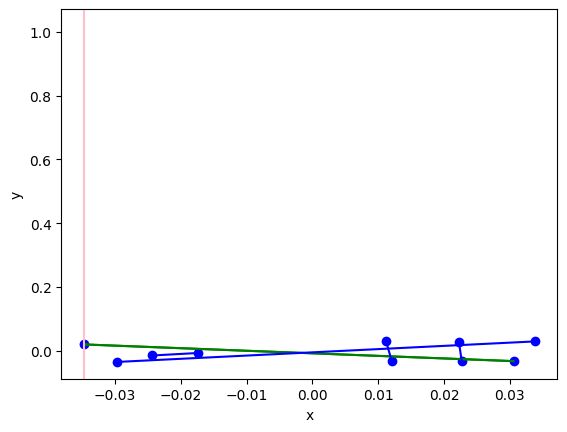

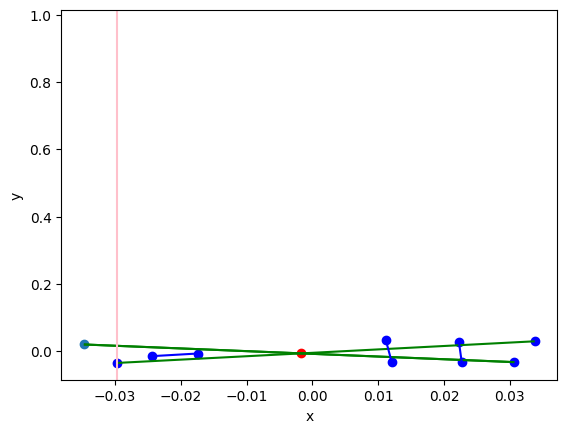

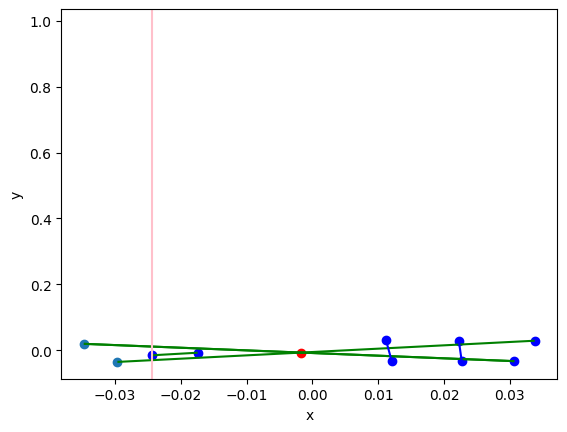

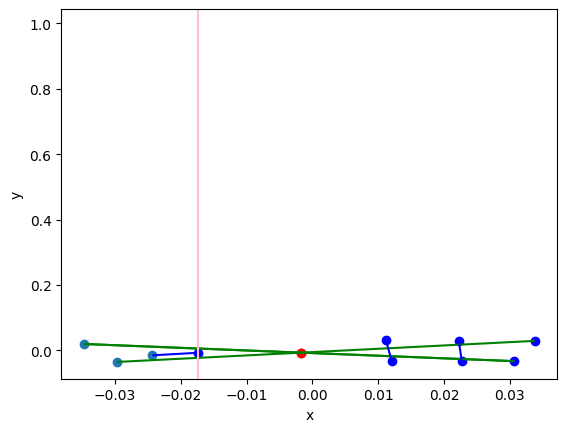

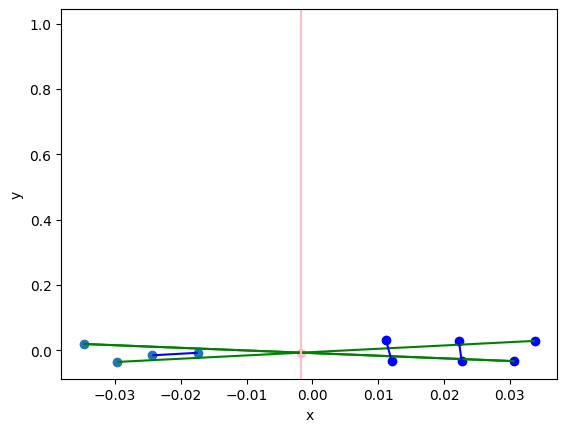

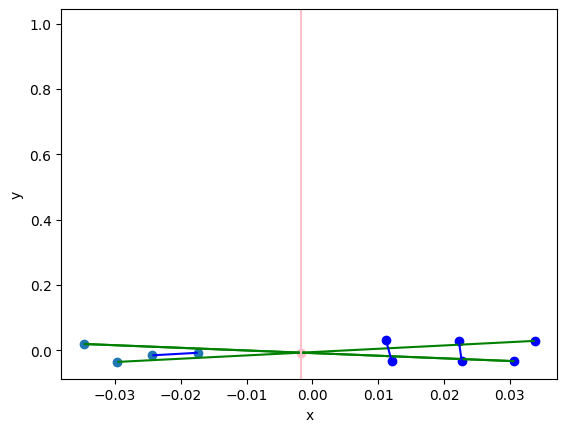

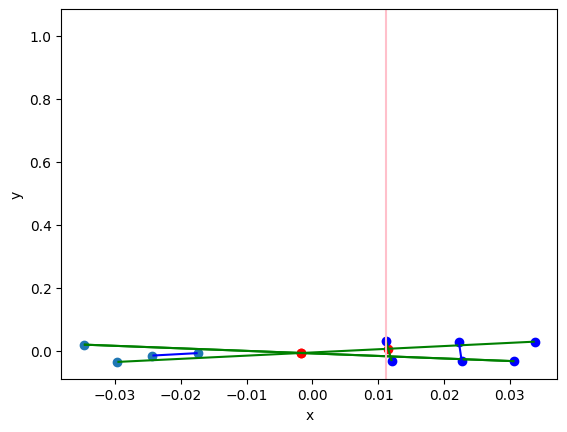

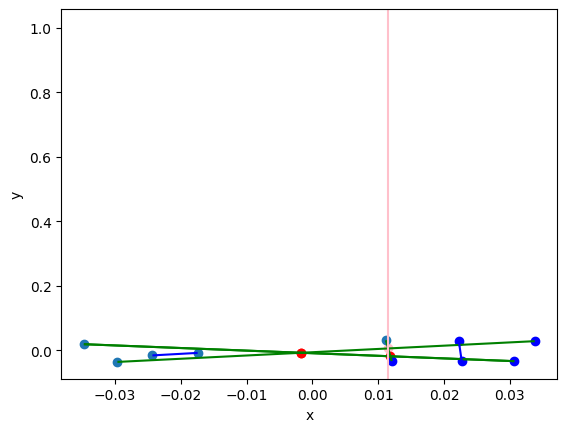

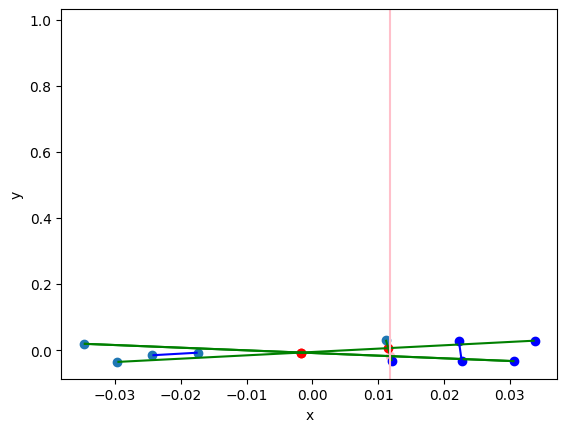

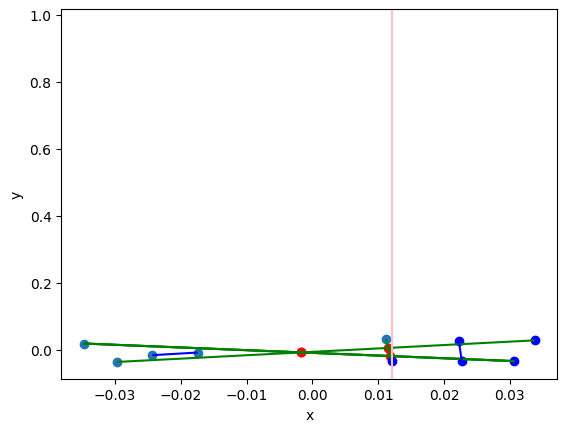

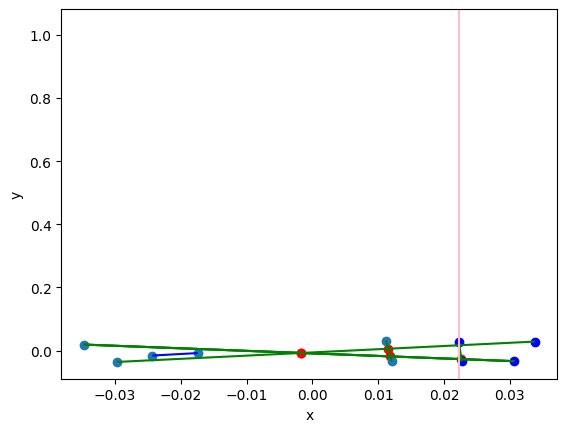

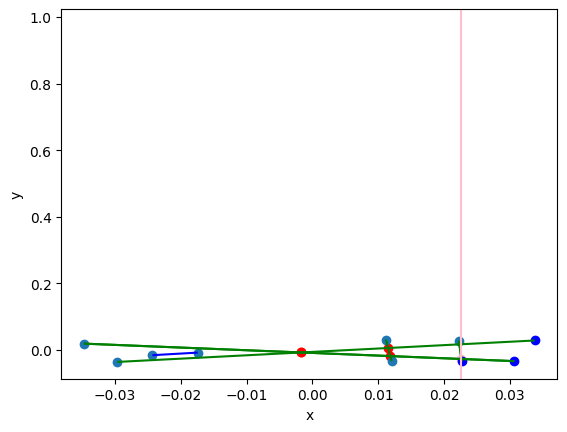

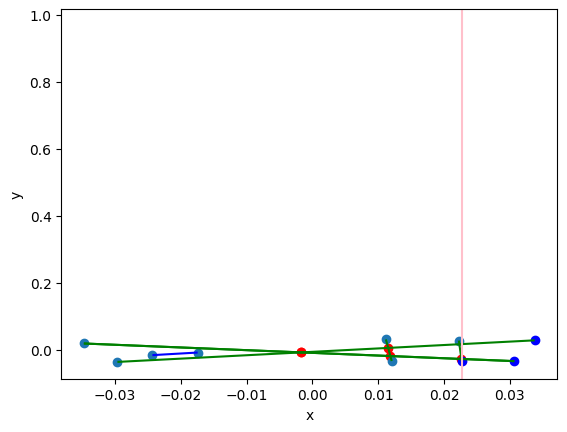

In [114]:
test1 = [((-0.034729840063279685, 0.019299425704806472), (0.030693547033494514, -0.03327410370695825)), ((-0.02962903361166678, -0.03563317233440923), (0.03379838574317193, 0.028735700214610402)), ((0.01117741800123645, 0.031431778645982955), (0.012064514775429996, -0.032937093903036674)), ((0.02226612767865581, 0.028061680606767267), (0.022709676065752582, -0.03394812331480138)), ((-0.024306452966505486, -0.015412584099115098), (-0.017431452966505487, -0.007661358608919019))]
find_intersections_with_visualization(test1)

### Czy konieczne były zmiany w strukturze zdarzeń. Jeśli tak, to jakie? Czy w przypadku obu algorytmów konieczne są takie same struktury zdarzeń?
### Odpowiedź uzasadnij. 

Odpowiedź here

### Jak obsługiwane są zdarzenia początku odcinka, końca odcinka i przecięcia odcinków z uwzględnianiem wybranych struktur danych?

Odpowiedź here

### Samemu zaprojektuj test, który uwzględnia taki układ odcinków, przy którym pewne przecięcia będą wykrywane więcej niż jeden raz

In [ ]:
# testing_sections = ???

In [ ]:
### Czy Twój program uwzględnia powyższy przypadek? Jeśli tak, to jak? 

Odpowiedź here

### Zadanie dodatkowe
Zaimplementuj inną strukturę stanu. Opisz ją w sprawozdaniu. Porównaj efektywność algorytmu dla obu struktur robiąc testy na odpowiednio dużych zestawach odcinków.